In [1]:
import pandas as pd
from glob import glob
import torch.nn.functional as F

datasets = glob('./dataset/*')

df_w = pd.read_csv(datasets[0], header=None)
df_v = pd.read_csv(datasets[1], header=None)

## Dataset

In [2]:
# матрица смежност
df_w

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.00,3165.94,8731.54,11903.45,7757.18,19878.51,18436.35,2213.47,5887.74,16132.12,...,18457.20,10725.64,9319.97,8273.62,10913.95,21561.83,10012.42,22614.08,26339.90,10012.42
1,3165.94,0.00,5625.76,8749.35,4695.51,16716.96,15274.00,1037.65,2910.29,12966.19,...,17207.37,10422.11,9441.75,8768.21,10565.72,20115.08,9915.24,21118.47,24716.98,9915.24
2,8731.54,5625.76,0.00,3280.12,1035.65,11465.75,10027.42,6659.59,2905.29,7631.76,...,17666.43,13214.26,12923.52,12756.84,13274.36,19981.55,13057.44,20827.51,23992.78,13057.44
3,11903.45,8749.35,3280.12,0.00,4315.55,8193.10,6759.32,9761.19,6171.81,4355.25,...,17482.07,14598.81,14683.19,14783.92,14610.97,19351.79,14634.38,20075.57,22897.82,14634.38
4,7757.18,4695.51,1035.65,4315.55,0.00,12500.86,11062.04,5733.14,1889.16,8667.35,...,17872.58,12942.92,12517.90,12251.20,13019.49,20308.62,12718.08,21186.77,24440.57,12718.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,21561.83,20115.08,19981.55,19351.79,20308.62,19511.11,19071.76,20213.28,20588.91,19083.19,...,3290.11,11723.54,13522.90,14893.28,11497.89,0.00,12631.46,1094.37,4919.10,12631.46
224,10012.42,9915.24,13057.44,14634.38,12718.08,20016.37,18818.51,9494.37,11861.80,17280.23,...,9344.11,910.65,891.79,2261.85,1136.11,12631.46,0.00,13725.79,17550.36,0.00
225,22614.08,21118.47,20827.51,20075.57,21186.77,19835.97,19470.62,21237.34,21522.07,19606.70,...,4384.20,12817.80,14617.24,15987.60,12592.15,1094.37,13725.79,0.00,3825.01,13725.79
226,26339.90,24716.98,23992.78,22897.82,24440.57,21457.04,21329.55,24890.70,24927.73,21843.90,...,8207.13,16642.60,18441.71,19812.20,16416.96,4919.10,17550.36,3825.01,0.00,17550.36


In [3]:
# Значения скорости движения (возможно, средняя скорость на участке дороги) в каждом временном интервале.
df_v

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,71.1,66.0,64.6,65.6,67.1,71.9,68.6,67.7,65.8,40.9,...,69.1,70.9,65.0,64.5,66.6,66.6,65.0,69.3,67.7,68.9
1,68.1,66.8,61.7,66.7,64.5,71.6,72.3,64.9,65.6,40.1,...,70.6,65.4,65.0,64.9,65.1,67.7,65.0,67.7,68.8,68.8
2,68.0,64.3,66.6,68.7,68.1,70.5,70.2,61.7,63.4,39.6,...,72.2,70.5,65.0,64.7,66.7,68.9,65.0,70.2,69.1,68.7
3,68.3,67.8,65.9,66.6,67.9,70.3,69.8,67.6,63.2,37.6,...,71.2,69.7,65.0,65.2,67.2,66.9,65.0,70.4,67.3,69.0
4,68.9,69.5,61.2,67.4,64.0,68.1,67.0,66.7,64.2,36.8,...,71.3,65.8,65.0,66.3,66.7,66.2,65.0,68.0,67.4,68.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12667,70.3,65.9,70.2,62.1,66.8,66.0,64.0,64.8,24.6,66.5,...,66.0,55.6,29.9,63.8,64.5,62.8,3.8,70.2,68.1,19.3
12668,69.9,54.0,68.2,62.2,67.4,65.8,64.4,61.3,35.1,69.2,...,66.8,62.8,29.9,62.9,66.6,63.0,3.5,68.2,68.3,18.9
12669,68.9,37.9,68.8,66.3,69.4,66.6,65.0,60.1,38.5,68.7,...,66.4,65.4,29.9,66.3,68.1,62.6,3.5,68.7,67.5,19.7
12670,69.2,37.8,68.7,63.6,68.5,66.2,64.1,60.9,40.5,68.5,...,67.6,68.9,30.2,64.8,68.2,63.1,3.7,67.7,67.4,19.5


## DataLoader

In [4]:
import torch
import numpy as np
import pandas as pd
import os
from torch_geometric.data import InMemoryDataset, Data
from shutil import copyfile

/mnt/tank/scratch/rgurtsiev/miniconda3/envs/my_env/lib/python3.10/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /mnt/tank/scratch/rgurtsiev/miniconda3/envs/my_env/lib/python3.10/site-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "


In [5]:
def distance_to_weight(W, sigma2=0.1, epsilon=0.5, gat_version=False):
    """
    Будем использовать Ядро Гаусса для получения весов ребр: где ближе — больше вес, дальше — вес близок к нулю.
    """
    n = W.shape[0]
    W = W / 10000.
    W2, W_mask = W * W, np.ones([n, n]) - np.identity(n)
    W = np.exp(-W2 / sigma2) * (np.exp(-W2 / sigma2) >= epsilon) * W_mask
    
    if gat_version: # само внимание
        W[W>0] = 1
        W += np.identity(n)

    return W


class TrafficDataset(InMemoryDataset):
    """
    Класс для создания датасета на тему Traffic
    """
    def __init__(self, config, W, root='', transform=None, pre_transform=None):
        self.config = config
        self.W = W
        super().__init__(root, transform, pre_transform)
        self.data, self.slices, self.n_node, self.mean, self.std_dev = torch.load(self.processed_paths[0], weights_only=False)

    @property
    def raw_file_names(self):
        return [os.path.join(self.raw_dir, 'PeMSD7_V_228.csv')]

    @property
    def processed_file_names(self):
        return ['./data.pt']

    def download(self):
        copyfile('./dataset/PeMSD7_V_228.csv', os.path.join(self.raw_dir, 'PeMSD7_V_228.csv'))

    def process(self):
        """
        Обработка сырых данных с дальнейшим сохранением        
        """

        data = pd.read_csv(self.raw_file_names[0], header=None).values
        mean =  np.mean(data)
        std_dev = np.std(data)
        data = z_score(data, np.mean(data), np.std(data))

        _, n_node = data.shape

        # формируем контекстное окно на основе длины предсказанного окна и подаваймого
        n_window = self.config['N_PRED'] + self.config['N_HIST']

        # создаем матрицу связи между узлами
        edge_index = torch.zeros((2, n_node**2), dtype=torch.long)
        
        # создаем веса для узлов
        edge_attr = torch.zeros((n_node**2, 1))
        
        num_edges = 0
        for i in range(n_node):
            for j in range(n_node):
                if self.W[i, j] != 0.:
                    edge_index[0, num_edges] = i
                    edge_index[1, num_edges] = j
                    edge_attr[num_edges] = self.W[i, j]
                    num_edges += 1
        
        # изменим кол. cell узлов
        edge_index = edge_index[:, :num_edges]
        edge_attr = edge_attr[:num_edges]

        sequences = []
        # T x F x N
        # Рассчитываем кол. слотов(N_SLOT), 
        # которые могут быть созданы в объеме данных за каждый день
        for i in range(self.config['N_DAYS']):
            for j in range(self.config['N_SLOT']):
                # for each time point construct a different graph with data object
                # Docs here: https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data
                g = Data()
                g.__num_nodes__ = n_node

                g.edge_index = edge_index
                g.edge_attr  = edge_attr

                # (F,N) switched to (N,F)
                start = i * self.config['N_DAY_SLOT'] + j
                end = start + n_window
                # [21, 228]
                
                # меняем 1 и 2 оси
                full_window = np.swapaxes(data[start:end, :], 0, 1)
                g.x = torch.FloatTensor(full_window[:, 0:self.config['N_HIST']])
                g.y = torch.FloatTensor(full_window[:, self.config['N_HIST']::])
                sequences += [g]

        data, slices = self.collate(sequences)
        torch.save((data, slices, n_node, mean, std_dev), self.processed_paths[0])

In [6]:
config = {
        'BATCH_SIZE': 50,
        'EPOCHS': 200,
        'WEIGHT_DECAY': 5e-5,
        'INITIAL_LR': 3e-4,
        'CHECKPOINT_DIR': './gnn-run',
        'N_PRED': 9,
        'N_HIST': 12,
        'DROPOUT': 0.2,
        'N_DAY_SLOT': 288,        
        'N_DAYS': 44,
        'USE_GAT_WEIGHTS': True,
        'N_NODE': 228,
    }
config['N_SLOT']= config['N_DAY_SLOT'] - (config['N_PRED']+config['N_HIST']) + 1

W = distance_to_weight(df_w.values, gat_version=config['USE_GAT_WEIGHTS'])
dataset = TrafficDataset(config, W)

In [7]:
from torch_geometric.loader import DataLoader
import torch.nn as nn


def get_splits(dataset: TrafficDataset, n_slot, splits):
    """
    Получаем train, val, test выборки
    """
    split_train, split_val, _ = splits
    i = n_slot*split_train
    j = n_slot*split_val
    train = dataset[:i]
    val = dataset[i:i+j]
    test = dataset[i+j:]

    return train, val, test


train, val, test = get_splits(dataset, config['N_SLOT'], (34, 5, 5))
train_dataloader = DataLoader(train, batch_size=config['BATCH_SIZE'], shuffle=True)
val_dataloader = DataLoader(val, batch_size=config['BATCH_SIZE'], shuffle=True)
test_dataloader = DataLoader(test, batch_size=config['BATCH_SIZE'], shuffle=False)

In [8]:
data = next(iter(train_dataloader))
data

DataBatch(edge_index=[2, 94600], edge_attr=[94600, 1], x=[11400, 12], y=[11400, 9], batch=[11400], ptr=[51])

# Model

In [9]:
from torch_geometric.nn import GATConv


class ST_GAT(nn.Module):
    def __init__(
        self,
        in_channels,
        out_channels,
        n_nodes,
        heads=9,
        dropout=0.0
    ):
        super(ST_GAT, self).__init__()

        self.n_pred = out_channels
        self.heads = heads
        self.dropout = dropout
        self.n_nodes = n_nodes

        self.preds = 9
        lstm1_hidden_size = 32
        lstm2_hidden_size = 128

        self.gat = GATConv(in_channels=in_channels, out_channels=in_channels, heads=heads, dropout=0, concat=False)
        
        self.lstm1 = torch.nn.LSTM(input_size=self.n_nodes, hidden_size=lstm1_hidden_size, num_layers=1)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)
                
        self.lstm2 = torch.nn.LSTM(input_size=lstm1_hidden_size, hidden_size=lstm2_hidden_size, num_layers=1)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)

        self.linear = torch.nn.Linear(lstm2_hidden_size, self.n_nodes*self.n_pred)
        torch.nn.init.xavier_uniform_(self.linear.weight)


    def forward(self, data, device):
        x, edge_index = data.x, data.edge_index
        
        x = torch.cuda.FloatTensor(x)
        x = self.gat(x, edge_index)
        x = F.dropout(x, self.dropout, training=self.training)

        # [batchsize*n_nodes, seq_length] -> [batch_size, n_nodes, seq_length]
        batch_size = data.num_graphs
        n_node = int(data.num_nodes/batch_size)
        x = torch.reshape(x, (batch_size, n_node, data.num_features))
        
        # sequence length = 12, batch_size = 50, n_node = 228
        x = torch.movedim(x, 2, 0)
        # [12, 50, 228] -> [12, 50, 32]
        x, _ = self.lstm1(x)
        # [12, 50, 32] -> [12, 50, 128]
        x, _ = self.lstm2(x)

        # [12, 50, 128] -> [50, 128]
        x = torch.squeeze(x[-1, :, :])
        # [50, 128] -> [50, 228*9]
        x = self.linear(x)

        # Now reshape into final output
        s = x.shape
        # [50, 228*9] -> [50, 228, 9]
        x = torch.reshape(x, (s[0], self.n_nodes, self.n_pred))
        # [50, 228, 9] ->  [11400, 9]
        x = torch.reshape(x, (s[0]*self.n_nodes, self.n_pred))
        return x

# Train

In [10]:
import torch
import torch.optim as optim
from tqdm import tqdm
import time
import os
import matplotlib.pyplot as plt
import wandb 


wandb.init(project="ST-GAT", config={
    "model": "ST_GAT"
})

def z_score(x, mean, std):
    return (x - mean) / std

def un_z_score(x_normed, mean, std):
    return x_normed * std  + mean

def MAPE(v, v_):
    return torch.mean(torch.abs((v_ - v)) /(v + 1e-15) * 100)

def RMSE(v, v_):
    return torch.sqrt(torch.mean((v_ - v) ** 2))

def MAE(v, v_):
    return torch.mean(torch.abs(v_ - v))

@torch.no_grad()
def eval(model, device, dataloader, type=''):
    model.eval()
    model.to(device)

    mae = 0
    rmse = 0
    mape = 0
    n = 0

    for i, batch in enumerate(dataloader):
        batch = batch.to(device)
        if batch.x.shape[0] == 1:
            continue

        with torch.no_grad():
            pred = model(batch, device)

        truth = batch.y.view(pred.shape)

        if i == 0:
            y_pred = torch.zeros(len(dataloader), pred.shape[0], pred.shape[1])
            y_truth = torch.zeros(len(dataloader), pred.shape[0], pred.shape[1])

        truth = un_z_score(truth, dataloader.dataset.mean, dataloader.dataset.std_dev)
        pred = un_z_score(pred, dataloader.dataset.mean, dataloader.dataset.std_dev)

        y_pred[i, :pred.shape[0], :] = pred
        y_truth[i, :pred.shape[0], :] = truth

        rmse += RMSE(truth, pred)
        mae += MAE(truth, pred)
        mape += MAPE(truth, pred)
        n += 1

    rmse, mae, mape = rmse / n, mae / n, mape / n

    print(f'{type}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}')
    return rmse, mae, mape, y_pred, y_truth

def train(model, device, dataloader, optimizer, loss_fn, epoch):
    model.train()
    for _, batch in enumerate(tqdm(dataloader, desc=f"Epoch {epoch}")):
        batch = batch.to(device)
        optimizer.zero_grad()
        y_pred = torch.squeeze(model(batch, device))
        loss = loss_fn()(y_pred.float(), torch.squeeze(batch.y).float())
        loss.backward()
        optimizer.step()

    wandb.log({"Loss/train": loss.item()}, step=epoch)
    return loss

def model_train(train_dataloader, val_dataloader, config, device):
    model = ST_GAT(
        in_channels=config['N_HIST'],
        out_channels=config['N_PRED'],
        n_nodes=config['N_NODE'],
        dropout=config['DROPOUT']
    )

    optimizer = optim.Adam(model.parameters(), lr=config['INITIAL_LR'], weight_decay=config['WEIGHT_DECAY'])
    loss_fn = torch.nn.MSELoss

    model.to(device)

    for epoch in range(config['EPOCHS']):
        loss = train(model, device, train_dataloader, optimizer, loss_fn, epoch)
        print(f"Loss: {loss:.3f}")

        if epoch % 5 == 0:
            train_mae, train_rmse, train_mape, _, _ = eval(model, device, train_dataloader, 'Train')
            val_mae, val_rmse, val_mape, _, _ = eval(model, device, val_dataloader, 'Valid')

            wandb.log({
                "MAE/train": train_mae,
                "RMSE/train": train_rmse,
                "MAPE/train": train_mape,
                "MAE/val": val_mae,
                "RMSE/val": val_rmse,
                "MAPE/val": val_mape
            }, step=epoch)

    timestr = time.strftime("%m-%d-%H%M%S")
    model_path = os.path.join(config["CHECKPOINT_DIR"], f"model_{timestr}.pt")
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss": loss,
    }, model_path)

    wandb.save(model_path)
    return model

def model_test(model, test_dataloader, device, config):
    _, _, _, y_pred, y_truth = eval(model, device, test_dataloader, 'Test')
    plot_prediction(test_dataloader, y_pred, y_truth, 0, config)

def plot_prediction(test_dataloader, y_pred, y_truth, node, config):
    s = y_truth.shape
    y_truth = y_truth.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    y_truth = y_truth[:, :, node, 0]
    y_truth = torch.flatten(y_truth)
    day0_truth = y_truth[:config['N_SLOT']]

    s = y_pred.shape
    y_pred = y_pred.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    y_pred = y_pred[:, :, node, 0]
    y_pred = torch.flatten(y_pred)
    day0_pred = y_pred[:config['N_SLOT']]

    t = [t for t in range(0, config['N_SLOT']*5, 5)]
    plt.plot(t, day0_pred, label='ST-GAT')
    plt.plot(t, day0_truth, label='truth')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Speed prediction')
    plt.title('Predictions of traffic over time')
    plt.legend()
    plt.savefig('predicted_times.png')
    plt.show()
    wandb.log({"prediction_plot": wandb.Image("predicted_times.png")})  # Log plot to wandb

def load_from_checkpoint(checkpoint_path, config):
    model = ST_GAT(in_channels=config['N_HIST'], out_channels=config['N_PRED'], n_nodes=config['N_NODE'])
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    return model

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: vilovnok. Use `wandb login --relogin` to force relogin


In [11]:
config['N_NODE'] = dataset.n_node
model = model_train(train_dataloader, val_dataloader, config, device='cuda')

Epoch 0:   0%|                                                                                                                       | 0/183 [00:00<?, ?it/s]/tmp/ipykernel_1722855/1888910789.py:47: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:78.)
  x = torch.cuda.FloatTensor(x)
Epoch 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:02<00:00, 88.23it/s]


Loss: 0.191
Train, MAE: 4.8492, RMSE: 7.7622, MAPE: 12.4675
Valid, MAE: 4.8278, RMSE: 7.6498, MAPE: 12.4058


Epoch 1: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.02it/s]


Loss: 0.359


Epoch 2: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.34it/s]


Loss: 0.318


Epoch 3: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.19it/s]


Loss: 0.238


Epoch 4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.21it/s]


Loss: 0.197


Epoch 5: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.36it/s]


Loss: 0.201
Train, MAE: 3.7180, RMSE: 6.3806, MAPE: 9.4582
Valid, MAE: 3.9464, RMSE: 6.7392, MAPE: 9.9865


Epoch 6: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.57it/s]


Loss: 0.203


Epoch 7: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.52it/s]


Loss: 0.215


Epoch 8: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.68it/s]


Loss: 0.176


Epoch 9: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.50it/s]


Loss: 0.248


Epoch 10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.87it/s]


Loss: 0.198
Train, MAE: 3.4554, RMSE: 5.9037, MAPE: 8.6754
Valid, MAE: 3.7976, RMSE: 6.4861, MAPE: 9.4988


Epoch 11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.42it/s]


Loss: 0.151


Epoch 12: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.79it/s]


Loss: 0.218


Epoch 13: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.94it/s]


Loss: 0.244


Epoch 14: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.72it/s]


Loss: 0.176


Epoch 15: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.31it/s]


Loss: 0.196
Train, MAE: 3.2649, RMSE: 5.5526, MAPE: 8.1412
Valid, MAE: 3.7168, RMSE: 6.3695, MAPE: 9.3417


Epoch 16: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.10it/s]


Loss: 0.187


Epoch 17: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.44it/s]


Loss: 0.174


Epoch 18: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.75it/s]


Loss: 0.135


Epoch 19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.81it/s]


Loss: 0.175


Epoch 20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.30it/s]


Loss: 0.158
Train, MAE: 3.1508, RMSE: 5.3340, MAPE: 7.7988
Valid, MAE: 3.6694, RMSE: 6.3040, MAPE: 9.1891


Epoch 21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.41it/s]


Loss: 0.156


Epoch 22: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.23it/s]


Loss: 0.169


Epoch 23: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.43it/s]


Loss: 0.110


Epoch 24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.82it/s]


Loss: 0.156


Epoch 25: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.87it/s]


Loss: 0.168
Train, MAE: 3.0762, RMSE: 5.1710, MAPE: 7.6521
Valid, MAE: 3.6531, RMSE: 6.2506, MAPE: 9.2041


Epoch 26: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.00it/s]


Loss: 0.162


Epoch 27: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.06it/s]


Loss: 0.173


Epoch 28: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.18it/s]


Loss: 0.140


Epoch 29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.83it/s]


Loss: 0.136


Epoch 30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.62it/s]


Loss: 0.124
Train, MAE: 3.0179, RMSE: 5.0587, MAPE: 7.4227
Valid, MAE: 3.6563, RMSE: 6.2571, MAPE: 9.1604


Epoch 31: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.62it/s]


Loss: 0.093


Epoch 32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.80it/s]


Loss: 0.177


Epoch 33: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.30it/s]


Loss: 0.171


Epoch 34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.95it/s]


Loss: 0.211


Epoch 35: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.50it/s]


Loss: 0.113
Train, MAE: 2.9888, RMSE: 4.9749, MAPE: 7.3325
Valid, MAE: 3.6858, RMSE: 6.2696, MAPE: 9.2246


Epoch 36: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.21it/s]


Loss: 0.099


Epoch 37: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.76it/s]


Loss: 0.127


Epoch 38: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 154.00it/s]


Loss: 0.148


Epoch 39: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.83it/s]


Loss: 0.140


Epoch 40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.58it/s]


Loss: 0.113
Train, MAE: 2.9543, RMSE: 4.8939, MAPE: 7.2164
Valid, MAE: 3.6855, RMSE: 6.2480, MAPE: 9.1376


Epoch 41: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.59it/s]


Loss: 0.139


Epoch 42: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.28it/s]


Loss: 0.123


Epoch 43: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 133.02it/s]


Loss: 0.100


Epoch 44: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.70it/s]


Loss: 0.118


Epoch 45: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.91it/s]


Loss: 0.117
Train, MAE: 2.9237, RMSE: 4.8335, MAPE: 7.1175
Valid, MAE: 3.7039, RMSE: 6.2975, MAPE: 9.1796


Epoch 46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.62it/s]


Loss: 0.093


Epoch 47: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.52it/s]


Loss: 0.100


Epoch 48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.86it/s]


Loss: 0.107


Epoch 49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.48it/s]


Loss: 0.165


Epoch 50: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.86it/s]


Loss: 0.089
Train, MAE: 2.8903, RMSE: 4.7786, MAPE: 7.0332
Valid, MAE: 3.7067, RMSE: 6.3088, MAPE: 9.1935


Epoch 51: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.93it/s]


Loss: 0.133


Epoch 52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.46it/s]


Loss: 0.193


Epoch 53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.63it/s]


Loss: 0.104


Epoch 54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.00it/s]


Loss: 0.081


Epoch 55: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.25it/s]


Loss: 0.086
Train, MAE: 2.8775, RMSE: 4.7349, MAPE: 6.9314
Valid, MAE: 3.7354, RMSE: 6.3301, MAPE: 9.1802


Epoch 56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.17it/s]


Loss: 0.119


Epoch 57: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.59it/s]


Loss: 0.140


Epoch 58: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.59it/s]


Loss: 0.122


Epoch 59: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.85it/s]


Loss: 0.134


Epoch 60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.22it/s]


Loss: 0.119
Train, MAE: 2.8495, RMSE: 4.6957, MAPE: 6.9293
Valid, MAE: 3.7131, RMSE: 6.3038, MAPE: 9.2337


Epoch 61: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.49it/s]


Loss: 0.118


Epoch 62: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.56it/s]


Loss: 0.103


Epoch 63: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.48it/s]


Loss: 0.103


Epoch 64: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.34it/s]


Loss: 0.112


Epoch 65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.63it/s]


Loss: 0.099
Train, MAE: 2.8380, RMSE: 4.6684, MAPE: 6.8840
Valid, MAE: 3.7340, RMSE: 6.3375, MAPE: 9.2321


Epoch 66: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.10it/s]


Loss: 0.136


Epoch 67: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.73it/s]


Loss: 0.135


Epoch 68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.40it/s]


Loss: 0.122


Epoch 69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.09it/s]


Loss: 0.110


Epoch 70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.56it/s]


Loss: 0.143
Train, MAE: 2.8236, RMSE: 4.6255, MAPE: 6.8202
Valid, MAE: 3.7401, RMSE: 6.3356, MAPE: 9.2485


Epoch 71: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 156.85it/s]


Loss: 0.082


Epoch 72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.88it/s]


Loss: 0.114


Epoch 73: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.21it/s]


Loss: 0.131


Epoch 74: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.09it/s]


Loss: 0.116


Epoch 75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.86it/s]


Loss: 0.116
Train, MAE: 2.8271, RMSE: 4.6108, MAPE: 6.8041
Valid, MAE: 3.7757, RMSE: 6.3712, MAPE: 9.2872


Epoch 76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.83it/s]


Loss: 0.081


Epoch 77: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.16it/s]


Loss: 0.106


Epoch 78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.26it/s]


Loss: 0.123


Epoch 79: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.49it/s]


Loss: 0.133


Epoch 80: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.79it/s]


Loss: 0.126
Train, MAE: 2.7984, RMSE: 4.5801, MAPE: 6.7314
Valid, MAE: 3.7519, RMSE: 6.3651, MAPE: 9.2339


Epoch 81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.19it/s]


Loss: 0.104


Epoch 82: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.23it/s]


Loss: 0.138


Epoch 83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.64it/s]


Loss: 0.109


Epoch 84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.54it/s]


Loss: 0.100


Epoch 85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.49it/s]


Loss: 0.116
Train, MAE: 2.7750, RMSE: 4.5554, MAPE: 6.7513
Valid, MAE: 3.7203, RMSE: 6.3254, MAPE: 9.2798


Epoch 86: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.50it/s]


Loss: 0.113


Epoch 87: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.28it/s]


Loss: 0.114


Epoch 88: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.35it/s]


Loss: 0.130


Epoch 89: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.67it/s]


Loss: 0.098


Epoch 90: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.92it/s]


Loss: 0.112
Train, MAE: 2.7890, RMSE: 4.5393, MAPE: 6.6881
Valid, MAE: 3.7815, RMSE: 6.3974, MAPE: 9.2994


Epoch 91: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.71it/s]


Loss: 0.146


Epoch 92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.33it/s]


Loss: 0.117


Epoch 93: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.44it/s]


Loss: 0.146


Epoch 94: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.86it/s]


Loss: 0.105


Epoch 95: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.04it/s]


Loss: 0.105
Train, MAE: 2.7680, RMSE: 4.5196, MAPE: 6.6765
Valid, MAE: 3.7555, RMSE: 6.3571, MAPE: 9.2986


Epoch 96: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.76it/s]


Loss: 0.107


Epoch 97: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.91it/s]


Loss: 0.116


Epoch 98: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.56it/s]


Loss: 0.073


Epoch 99: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.20it/s]


Loss: 0.113


Epoch 100: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.39it/s]


Loss: 0.136
Train, MAE: 2.7647, RMSE: 4.5127, MAPE: 6.7059
Valid, MAE: 3.7550, RMSE: 6.3559, MAPE: 9.3291


Epoch 101: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.29it/s]


Loss: 0.125


Epoch 102: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.50it/s]


Loss: 0.083


Epoch 103: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.02it/s]


Loss: 0.136


Epoch 104: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.15it/s]


Loss: 0.111


Epoch 105: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.46it/s]


Loss: 0.121
Train, MAE: 2.7692, RMSE: 4.4927, MAPE: 6.6441
Valid, MAE: 3.7883, RMSE: 6.3931, MAPE: 9.3914


Epoch 106: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.76it/s]


Loss: 0.125


Epoch 107: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.02it/s]


Loss: 0.105


Epoch 108: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.01it/s]


Loss: 0.098


Epoch 109: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.77it/s]


Loss: 0.121


Epoch 110: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.63it/s]


Loss: 0.131
Train, MAE: 2.7406, RMSE: 4.4694, MAPE: 6.6260
Valid, MAE: 3.7371, RMSE: 6.3463, MAPE: 9.2826


Epoch 111: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.37it/s]


Loss: 0.107


Epoch 112: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.82it/s]


Loss: 0.128


Epoch 113: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.48it/s]


Loss: 0.119


Epoch 114: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.96it/s]


Loss: 0.118


Epoch 115: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.00it/s]


Loss: 0.099
Train, MAE: 2.7519, RMSE: 4.4593, MAPE: 6.5764
Valid, MAE: 3.7937, RMSE: 6.4084, MAPE: 9.3203


Epoch 116: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.10it/s]


Loss: 0.118


Epoch 117: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.90it/s]


Loss: 0.121


Epoch 118: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.60it/s]


Loss: 0.126


Epoch 119: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.31it/s]


Loss: 0.103


Epoch 120: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.86it/s]


Loss: 0.111
Train, MAE: 2.7426, RMSE: 4.4460, MAPE: 6.5927
Valid, MAE: 3.7936, RMSE: 6.4217, MAPE: 9.3973


Epoch 121: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.41it/s]


Loss: 0.108


Epoch 122: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.00it/s]


Loss: 0.115


Epoch 123: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.59it/s]


Loss: 0.115


Epoch 124: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.82it/s]


Loss: 0.129


Epoch 125: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.15it/s]


Loss: 0.122
Train, MAE: 2.7328, RMSE: 4.4294, MAPE: 6.5783
Valid, MAE: 3.7866, RMSE: 6.4056, MAPE: 9.4362


Epoch 126: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.13it/s]


Loss: 0.102


Epoch 127: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.77it/s]


Loss: 0.084


Epoch 128: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.00it/s]


Loss: 0.095


Epoch 129: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.63it/s]


Loss: 0.100


Epoch 130: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.33it/s]


Loss: 0.084
Train, MAE: 2.7323, RMSE: 4.4289, MAPE: 6.5625
Valid, MAE: 3.8013, RMSE: 6.4387, MAPE: 9.4356


Epoch 131: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.68it/s]


Loss: 0.121


Epoch 132: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.61it/s]


Loss: 0.133


Epoch 133: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.83it/s]


Loss: 0.123


Epoch 134: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.78it/s]


Loss: 0.102


Epoch 135: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.62it/s]


Loss: 0.117
Train, MAE: 2.7262, RMSE: 4.4129, MAPE: 6.5326
Valid, MAE: 3.8042, RMSE: 6.4394, MAPE: 9.4331


Epoch 136: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.12it/s]


Loss: 0.096


Epoch 137: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.31it/s]


Loss: 0.112


Epoch 138: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.00it/s]


Loss: 0.099


Epoch 139: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.09it/s]


Loss: 0.093


Epoch 140: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.13it/s]


Loss: 0.117
Train, MAE: 2.7145, RMSE: 4.4060, MAPE: 6.5117
Valid, MAE: 3.8069, RMSE: 6.4610, MAPE: 9.4493


Epoch 141: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 157.90it/s]


Loss: 0.097


Epoch 142: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.13it/s]


Loss: 0.121


Epoch 143: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.39it/s]


Loss: 0.104


Epoch 144: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.90it/s]


Loss: 0.121


Epoch 145: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.08it/s]


Loss: 0.149
Train, MAE: 2.7141, RMSE: 4.3951, MAPE: 6.5172
Valid, MAE: 3.8053, RMSE: 6.4505, MAPE: 9.4284


Epoch 146: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.31it/s]


Loss: 0.095


Epoch 147: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.65it/s]


Loss: 0.115


Epoch 148: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.29it/s]


Loss: 0.117


Epoch 149: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.32it/s]


Loss: 0.085


Epoch 150: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.89it/s]


Loss: 0.130
Train, MAE: 2.7113, RMSE: 4.3838, MAPE: 6.4861
Valid, MAE: 3.7987, RMSE: 6.4346, MAPE: 9.3961


Epoch 151: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.97it/s]


Loss: 0.116


Epoch 152: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.04it/s]


Loss: 0.123


Epoch 153: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.55it/s]


Loss: 0.121


Epoch 154: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.69it/s]


Loss: 0.145


Epoch 155: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.62it/s]


Loss: 0.120
Train, MAE: 2.7059, RMSE: 4.3816, MAPE: 6.4929
Valid, MAE: 3.8178, RMSE: 6.4667, MAPE: 9.4651


Epoch 156: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.45it/s]


Loss: 0.087


Epoch 157: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.69it/s]


Loss: 0.086


Epoch 158: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 152.40it/s]


Loss: 0.117


Epoch 159: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.13it/s]


Loss: 0.098


Epoch 160: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.22it/s]


Loss: 0.093
Train, MAE: 2.6988, RMSE: 4.3740, MAPE: 6.5044
Valid, MAE: 3.8071, RMSE: 6.4648, MAPE: 9.5269


Epoch 161: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.46it/s]


Loss: 0.078


Epoch 162: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.86it/s]


Loss: 0.109


Epoch 163: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.96it/s]


Loss: 0.127


Epoch 164: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.20it/s]


Loss: 0.112


Epoch 165: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 153.21it/s]


Loss: 0.105
Train, MAE: 2.7071, RMSE: 4.3721, MAPE: 6.4756
Valid, MAE: 3.8338, RMSE: 6.4884, MAPE: 9.5593


Epoch 166: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 172.77it/s]


Loss: 0.115


Epoch 167: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 172.96it/s]


Loss: 0.101


Epoch 168: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 171.79it/s]


Loss: 0.136


Epoch 169: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 172.87it/s]


Loss: 0.108


Epoch 170: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 172.72it/s]


Loss: 0.134
Train, MAE: 2.7027, RMSE: 4.3640, MAPE: 6.4271
Valid, MAE: 3.8437, RMSE: 6.5099, MAPE: 9.4608


Epoch 171: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 168.59it/s]


Loss: 0.102


Epoch 172: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 167.79it/s]


Loss: 0.095


Epoch 173: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.28it/s]


Loss: 0.090


Epoch 174: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.27it/s]


Loss: 0.115


Epoch 175: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.32it/s]


Loss: 0.096
Train, MAE: 2.7007, RMSE: 4.3495, MAPE: 6.4277
Valid, MAE: 3.8565, RMSE: 6.5181, MAPE: 9.5118


Epoch 176: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.34it/s]


Loss: 0.116


Epoch 177: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 171.86it/s]


Loss: 0.128


Epoch 178: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.39it/s]


Loss: 0.114


Epoch 179: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.80it/s]


Loss: 0.117


Epoch 180: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 162.75it/s]


Loss: 0.108
Train, MAE: 2.6897, RMSE: 4.3460, MAPE: 6.4275
Valid, MAE: 3.8383, RMSE: 6.5318, MAPE: 9.4961


Epoch 181: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.15it/s]


Loss: 0.106


Epoch 182: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.34it/s]


Loss: 0.116


Epoch 183: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.59it/s]


Loss: 0.114


Epoch 184: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.89it/s]


Loss: 0.105


Epoch 185: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.46it/s]


Loss: 0.114
Train, MAE: 2.6837, RMSE: 4.3387, MAPE: 6.4380
Valid, MAE: 3.8409, RMSE: 6.5214, MAPE: 9.5477


Epoch 186: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.67it/s]


Loss: 0.109


Epoch 187: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 170.36it/s]


Loss: 0.089


Epoch 188: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 165.11it/s]


Loss: 0.082


Epoch 189: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.61it/s]


Loss: 0.100


Epoch 190: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 164.24it/s]


Loss: 0.085
Train, MAE: 2.6870, RMSE: 4.3284, MAPE: 6.4193
Valid, MAE: 3.8314, RMSE: 6.4914, MAPE: 9.5475


Epoch 191: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.92it/s]


Loss: 0.091


Epoch 192: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.35it/s]


Loss: 0.098


Epoch 193: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 159.55it/s]


Loss: 0.100


Epoch 194: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.91it/s]


Loss: 0.101


Epoch 195: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 160.04it/s]


Loss: 0.077
Train, MAE: 2.6811, RMSE: 4.3261, MAPE: 6.4208
Valid, MAE: 3.8219, RMSE: 6.4861, MAPE: 9.4912


Epoch 196: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.83it/s]


Loss: 0.132


Epoch 197: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 158.70it/s]


Loss: 0.083


Epoch 198: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 161.49it/s]


Loss: 0.105


Epoch 199: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:01<00:00, 163.78it/s]


Loss: 0.148


Test, MAE: 3.9813, RMSE: 6.4833, MAPE: 9.4440


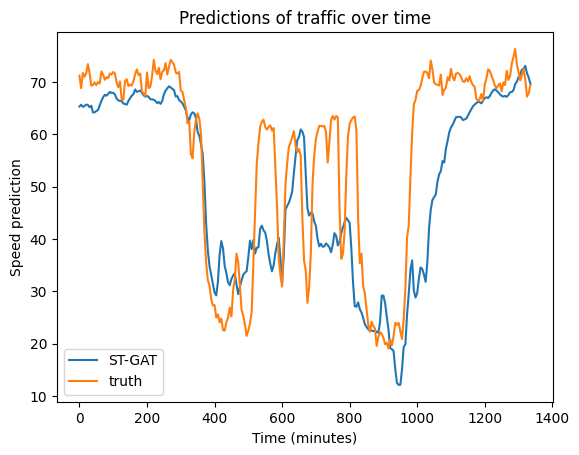

In [14]:
model_test(model, test_dataloader, 'cuda', config)